# Phase Synchrony

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert
from scipy.signal import fftconvolve
from frites.conn.conn_tf import _create_kernel

### How does kernel smoothing affect the PLV?

In [5]:
x = np.arange(0, 1000, 0.1)
y1 = np.sin(x)
y2 = np.sin(x)

kernel = _create_kernel(1000, 1, kernel='hanning')[0, :] # the length of the time smoothing is very important!

hill1 = hilbert(y1)
hill2 = hilbert(y2)
s_xy = hill1 * np.conj(hill2)
exp_dphi = s_xy / np.abs(s_xy)
exp_dphi = fftconvolve(exp_dphi, kernel) # comment this line to see the effect of the kernel smoothing

# Does it make any difference if we calculate the mean first and then get the length of the average vector?
plv1 = np.abs((s_xy / np.abs(s_xy)).mean())
plv2 = np.abs(exp_dphi).mean()

plv1, plv2

(1.0, 0.9091735612328392)

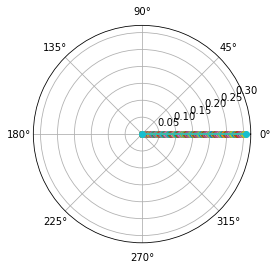

In [4]:
# Plot the normalized phase difference
for x in exp_dphi[:200]:
    plt.polar([0,np.angle(x)],[0,abs(x)],marker='o')